In [12]:
import torch
from torchinfo import summary
import torch.optim as optim
from torch.nn import MSELoss
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


from utils.metrics import validation_scores
from models.prediction.AE import AE
from models.prediction.VAE import ConditionalVAE
from models.prediction.HVAE import ConditionalHierarchicalVAE
from utils.datasets import MNIST_SR
from utils.utils import gaussian_kl
from torchvision.transforms import Resize


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
num_epochs = 100
batch_size = 512
scalefactor = 4

path = f"trained_models/AE_MNIST_{scalefactor}x_prediction_mse.pth"

latent_dims = [64, 32, 64]
# condition_dims = [32, 64]
channels = [16, 32, 64, 128]
# cond_channels = [16, 32]
in_channels = 1
cond_base_width = 32 // scalefactor
AEmodel = AE(in_channels=in_channels,
                          latent_dims=latent_dims,
                          channels=channels,
                          base_width=cond_base_width
                          ).to(device)
print(AEmodel.sample(torch.randn(1, in_channels, cond_base_width, cond_base_width).to(device)).shape)
AEmodel.load_state_dict(torch.load(path))
summary(AEmodel, input_size=[(1, in_channels, cond_base_width, cond_base_width)])

torch.Size([1, 1, 32, 32])


Layer (type:depth-idx)                   Output Shape              Param #
AE                                       [1, 1, 32, 32]            --
├─AELREncoder: 1-1                       [1, 64]                   --
│    └─Conv2d: 2-1                       [1, 16, 8, 8]             32
│    └─Conv2d: 2-2                       [1, 32, 4, 4]             8,224
│    └─Conv2d: 2-3                       [1, 64, 2, 2]             32,832
│    └─Linear: 2-4                       [1, 64]                   16,448
├─AEDecoder: 1-2                         [1, 1, 32, 32]            --
│    └─Linear: 2-5                       [1, 2048]                 133,120
│    └─ConvTranspose2d: 2-6              [1, 64, 8, 8]             131,136
│    └─ConvTranspose2d: 2-7              [1, 32, 16, 16]           32,800
│    └─ConvTranspose2d: 2-8              [1, 16, 32, 32]           8,208
│    └─Conv2d: 2-9                       [1, 1, 32, 32]            17
Total params: 362,817
Trainable params: 362,817
Non-train

In [9]:
num_epochs = 100
batch_size = 512
scalefactor = 4

path = f"trained_models/VAE_MNIST_{scalefactor}x_prediction_mse.pth"

latent_dims = [64]
condition_dims = [32, 64]
channels = [16, 32, 64, 128]
cond_channels = [16, 32]
in_channels = 1
cond_base_width = 32 // scalefactor
VAEmodel = ConditionalVAE(in_channels=in_channels,
                          latent_dims=latent_dims,
                          channels=channels,
                          cond_channels=cond_channels,
                          condition_dims=condition_dims,
                          cond_base_width=cond_base_width
                          ).to(device)
print(VAEmodel.sample(torch.randn(1, in_channels, cond_base_width, cond_base_width).to(device)).shape)
VAEmodel.load_state_dict(torch.load(path))
summary(VAEmodel, input_size=[(1, in_channels, 32, 32), (1, in_channels, cond_base_width, cond_base_width)])

torch.Size([1, 1, 32, 32])


Layer (type:depth-idx)                   Output Shape              Param #
ConditionalVAE                           [1, 1, 32, 32]            --
├─ConditionalVAEEncoder: 1-1             [1, 64]                   --
│    └─Conv2d: 2-1                       [1, 16, 32, 32]           32
│    └─Conv2d: 2-2                       [1, 32, 16, 16]           8,224
│    └─Conv2d: 2-3                       [1, 64, 8, 8]             32,832
│    └─Conv2d: 2-4                       [1, 128, 4, 4]            131,200
│    └─Linear: 2-5                       [1, 64]                   131,136
│    └─Linear: 2-6                       [1, 64]                   131,136
├─ConditionalVAELREncoder: 1-2           [1, 32]                   --
│    └─Conv2d: 2-7                       [1, 16, 8, 8]             32
│    └─Conv2d: 2-8                       [1, 32, 4, 4]             8,224
│    └─Linear: 2-9                       [1, 32]                   16,416
│    └─Linear: 2-10                      [1, 64]        

In [10]:
num_epochs = 100
batch_size = 512
scalefactor = 4

path = f"trained_models/HVAE_MNIST_{scalefactor}x_prediction_mse.pth"

latent_dims = [16, 32, 64]
condition_dims = [32, 64]
channels = [16, 32, 64, 128]
cond_channels = [16, 32]
in_channels = 1
cond_base_width = 32 // scalefactor
HVAEmodel = ConditionalHierarchicalVAE(in_channels=in_channels,
                          latent_dims=latent_dims,
                          channels=channels,
                          cond_channels=cond_channels,
                          condition_dims=condition_dims,
                          cond_base_width=cond_base_width
                          ).to(device)
print(HVAEmodel.sample(torch.randn(1, in_channels, cond_base_width, cond_base_width).to(device)).shape)
HVAEmodel.load_state_dict(torch.load(path))
summary(HVAEmodel, input_size=[(1, in_channels, 32, 32), (1, in_channels, cond_base_width, cond_base_width)])

torch.Size([1, 1, 32, 32])


Layer (type:depth-idx)                        Output Shape              Param #
ConditionalHierarchicalVAE                    [1, 1, 32, 32]            --
├─ConditionalHierarchicalEncoder: 1-1         [1, 16]                   --
│    └─Conv2d: 2-1                            [1, 16, 32, 32]           32
│    └─Conv2d: 2-2                            [1, 32, 16, 16]           8,224
│    └─Conv2d: 2-3                            [1, 64, 8, 8]             32,832
│    └─Conv2d: 2-4                            [1, 128, 4, 4]            131,200
│    └─Linear: 2-5                            [1, 16]                   32,784
│    └─Linear: 2-6                            [1, 16]                   32,784
│    └─Linear: 2-7                            [1, 32]                   131,104
│    └─Linear: 2-8                            [1, 32]                   131,104
│    └─Linear: 2-9                            [1, 64]                   524,352
│    └─Linear: 2-10                           [1, 64]       

In [11]:
train_dataset = MNIST_SR(scale_factor=scalefactor, split='train')
test_dataset = MNIST_SR(scale_factor=scalefactor, split='test')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
num_train_data = len(train_dataset)
print(f"Dataset Loaded: {len(train_dataset)} training samples, {len(test_dataset)} validation samples")

Dataset Loaded: 60000 training samples, 10000 validation samples


In [17]:
HR, LR = test_dataset.get_samples(1000)
SR_ae = AEmodel.sample(LR)
SR_vae = VAEmodel.sample(LR)
SR_hvae = HVAEmodel.sample(LR)

In [19]:
def show_image(x, low_res, superres_ae, superres_vae, superres_hvae, n):
    # compare original, low resolution and ae, vae, hvae super resolution images
    interpolated = Resize((32, 32))(low_res)

    fig, axs = plt.subplots(6, n, figsize=(20, 12))
    for i in range(n):
        #figure description above every row in the middle
        if i == 0:
            axs[0, i].set_title('Original')
            axs[1, i].set_title('Low Resolution')
            axs[2, i].set_title('Interpolated')
            axs[3, i].set_title('Autoencoder')
            axs[4, i].set_title('Variational Autoencoder')
            axs[5, i].set_title('Hierarchcal Variational Autoencoder')

        axs[0, i].imshow(x[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
        axs[0, i].axis('off')

        axs[1, i].imshow(low_res[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
        axs[1, i].axis('off')

        axs[2, i].imshow(interpolated[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
        axs[2, i].axis('off')

        axs[3, i].imshow(superres_ae[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
        axs[3, i].axis('off')

        axs[4, i].imshow(superres_vae[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
        axs[4, i].axis('off')

        axs[5, i].imshow(superres_hvae[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
        axs[5, i].axis('off')
        

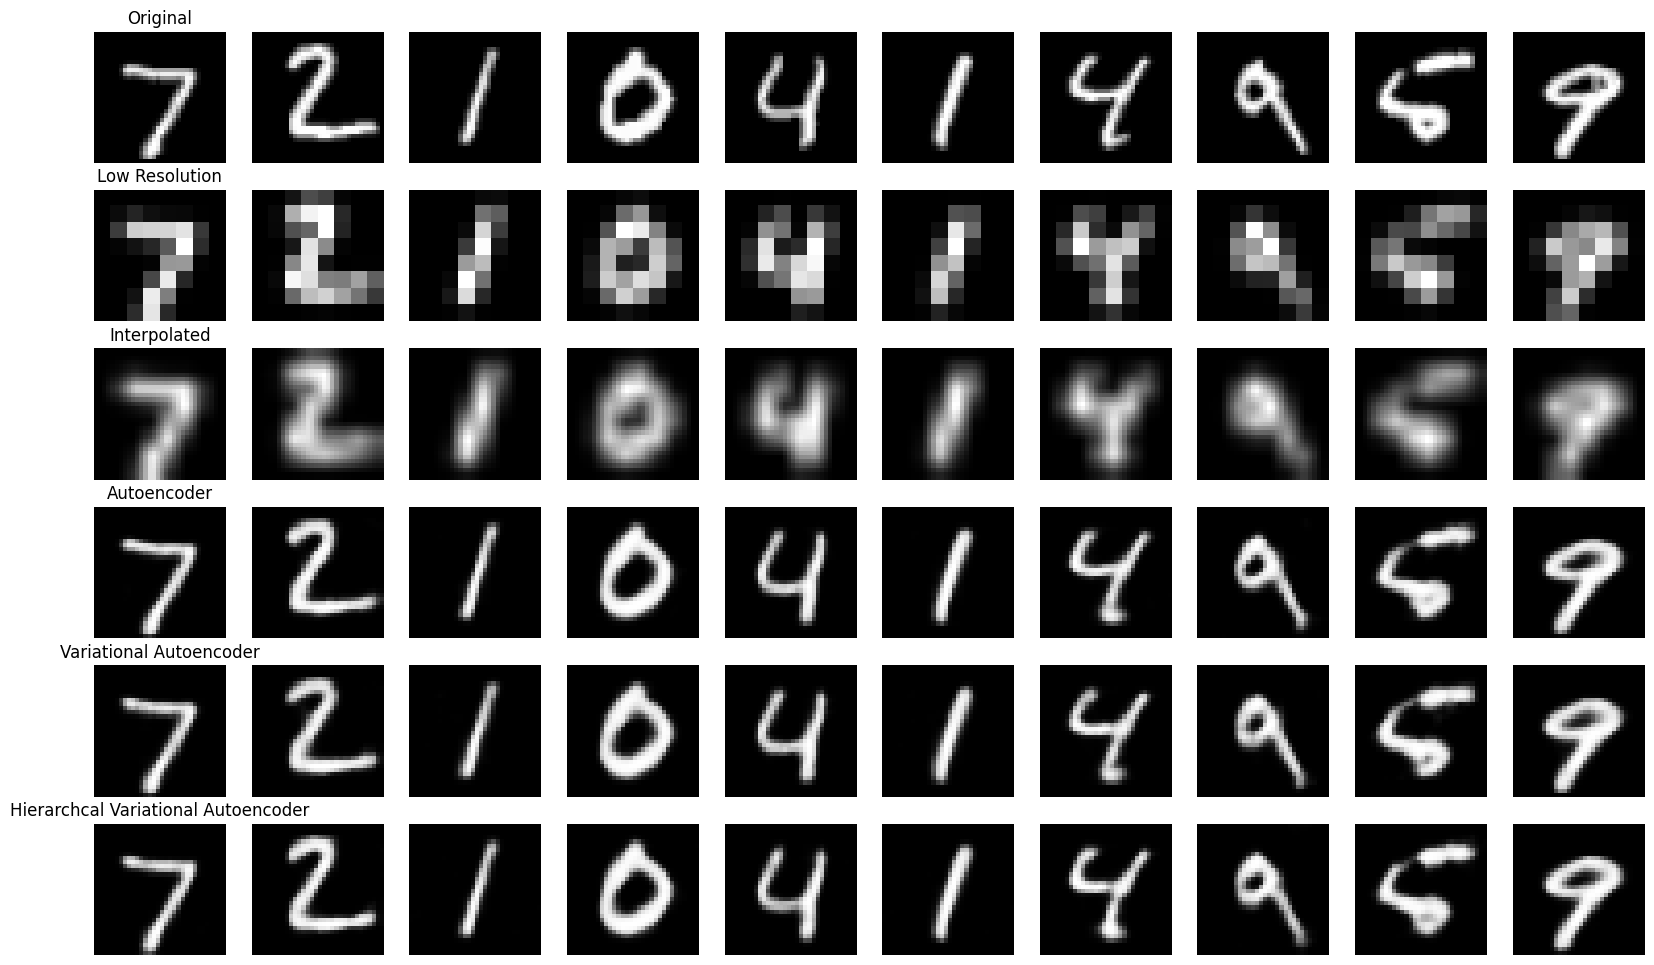

In [20]:
show_image(HR, LR, SR_ae, SR_vae, SR_hvae, 10)

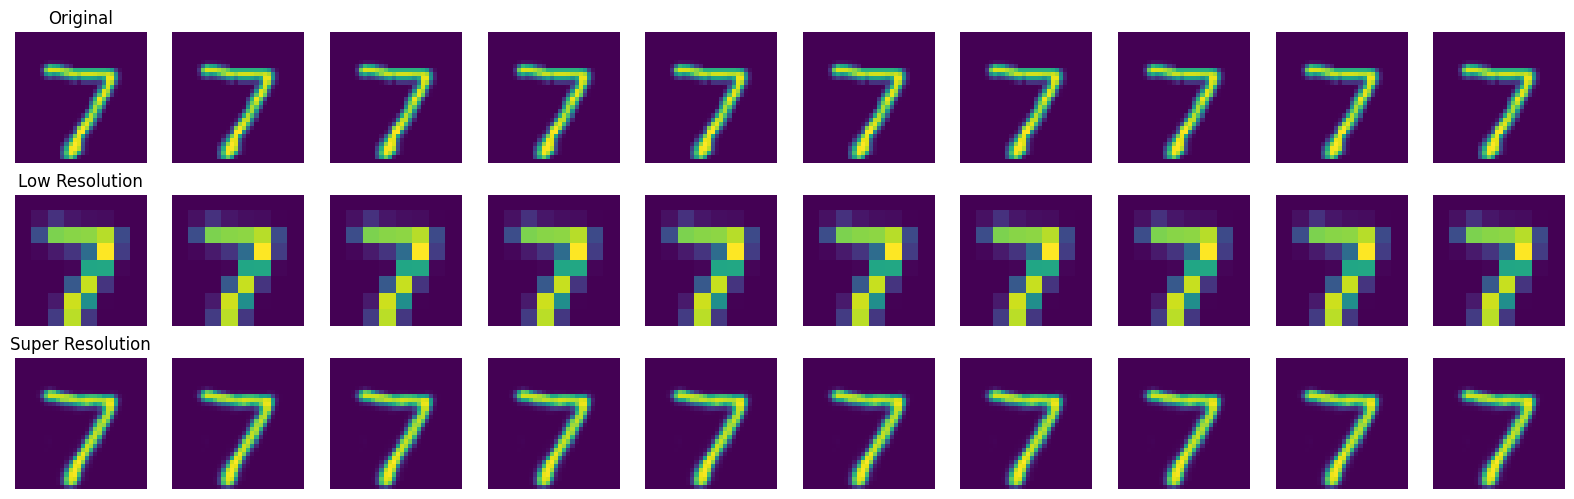

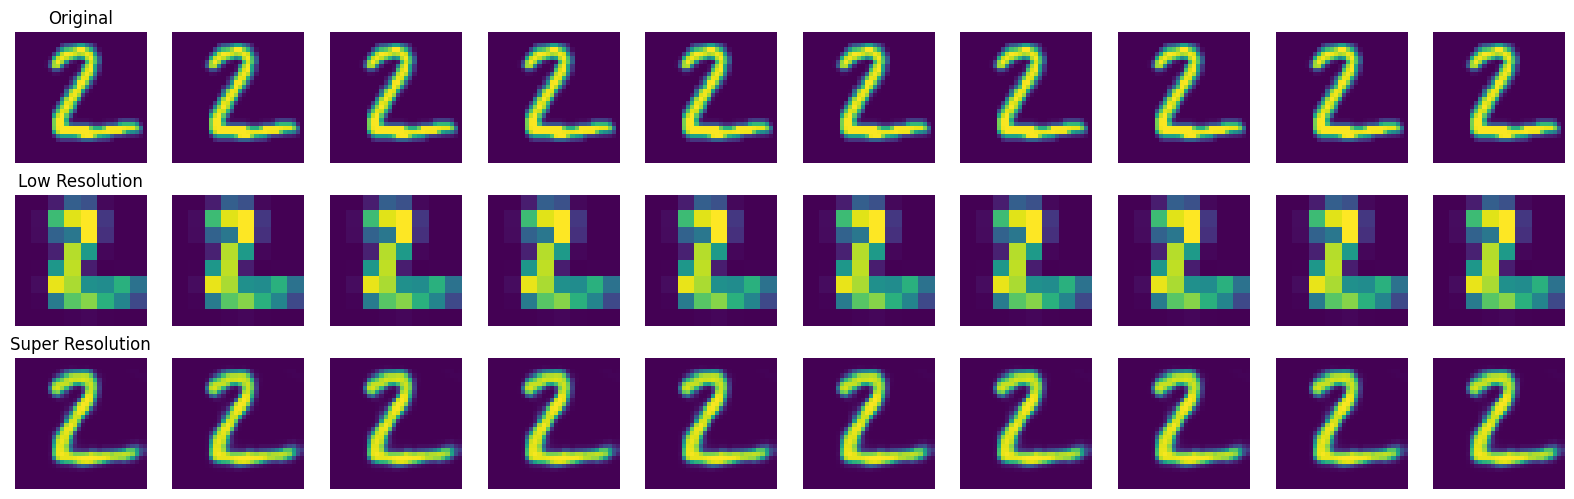

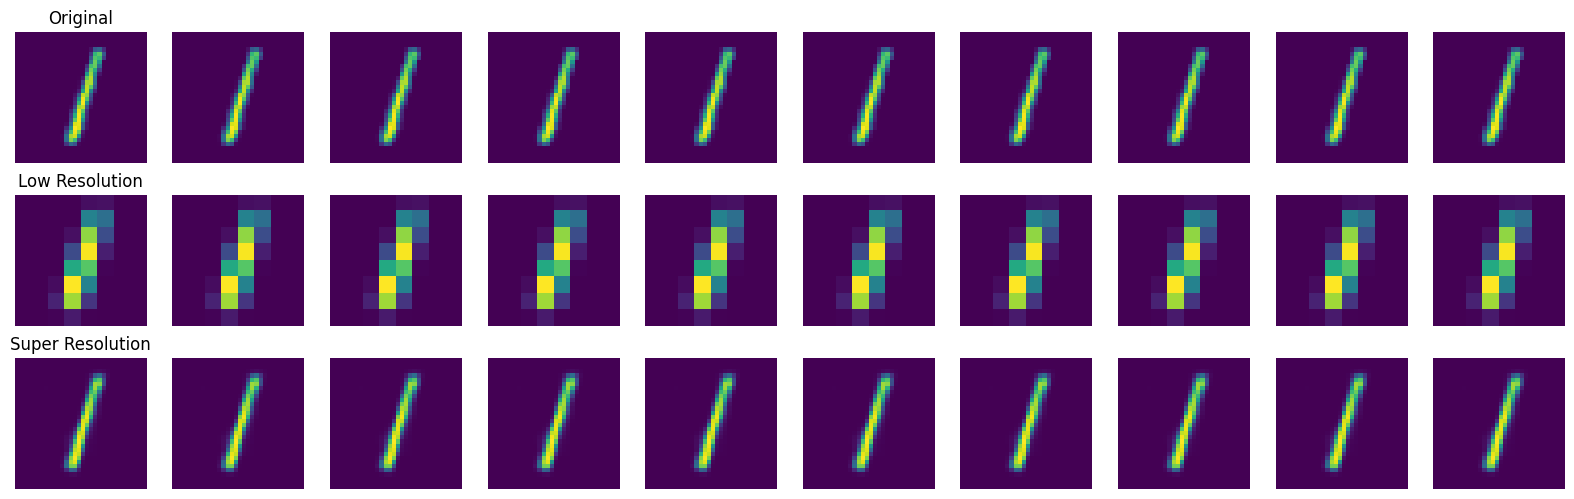

In [13]:
n_samp = 3

for i in range(n_samp):
    reference = HR[i]
    reference = reference.repeat(batch_size, 1, 1, 1)
    reference_inp = LR[i].unsqueeze(0).repeat(batch_size, 1, 1, 1)
    
    samples = model.sample(reference_inp).detach().cpu()

    show_image(reference, reference_inp, samples, 10)

In [14]:
mse_val, perceptual_val, psnr_val, ssim_val, lpips_val, brisque_val, psnr_consistency_val, mse_diversity_val, lpips_diversity_val = validation_scores(model, HR, LR)
print("MSE:", mse_val)
print("Perceptual:", perceptual_val)
print("PSNR:", psnr_val)
print("SSIM:", ssim_val)
print("LPIPS:", lpips_val)
print("BRISQUE:", brisque_val)
print("PSNR Consistency:", psnr_consistency_val)
print("MSE Diversity:", mse_diversity_val)
print("LPIPS Diversity:", lpips_diversity_val)

c:\Users\maxhe\anaconda3\envs\ML\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\maxhe\anaconda3\envs\ML\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MSE: 0.0026248819194734097
Perceptual: 0.6920102834701538
PSNR: 26.70466423034668
SSIM: 0.9597422480583191
LPIPS: 0.034813299775123596
BRISQUE: 72.70661926269531
PSNR Consistency: 41.33844757080078
MSE Diversity: 9.844594917727309e-17
LPIPS Diversity: 2.0184819469385343e-13
